## Assignment : 14

<pre>
1. You can work with preprocessed_data.csv for the assignment. You can get the data from - <a href='https://drive.google.com/drive/u/0/folders/1CJnItndeSSJu7aragQoXWZS9-0apN6pp'>Data folder </a>
2. Load the data in your notebook.
3. After step 2 you have to train 3 types of models as discussed below. 
4. For all the model use <a href='https://scikit-learn.org/stable/modules/model_evaluation.html#roc-metrics'>'auc'</a> as a metric. check <a  href='https://stackoverflow.com/a/46844409'>this</a> and <a  href='https://www.kaggle.com/c/santander-customer-transaction-prediction/discussion/80807'>this</a> for using auc as a metric 
5. You are free to choose any number of layers/hiddden units but you have to use same type of architectures shown below. 
6. You can use any one of the optimizers and choice of Learning rate and momentum.
7. For all the model's use <a href='https://www.youtube.com/watch?v=2U6Jl7oqRkM'>TensorBoard</a> and plot the Metric value and Loss with epoch. While submitting, take a screenshot of plots and include those images in a separate pad and write your observations about them.
8. Make sure that you are using GPU to train the given models.
</pre>

In [ ]:
#you can use gdown modules to import dataset for the assignment
#for importing any file from drive to Colab you can write the syntax as !gdown --id file_id
#you can run the below cell to import the required preprocessed data.csv file and glove vector

In [ ]:
#!gdown --id 1GpATd_pM4mcnWWIs28-s1lgqdAg2Wdv-
#!gdown --id 1pGd5tLwA30M7wkbJKdXHaae9tYVDICJ_

## <font color='red'> Model-1 </font>
Build and Train deep neural network as shown below

<img src='https://i.imgur.com/w395Yk9.png'>
ref: https://i.imgur.com/w395Yk9.png

- __Input_seq_total_text_data__ --- You have to give Total text data columns. After this use the Embedding layer to get word vectors. Use given predefined glove word vectors, don't train any word vectors. After this use LSTM and get the LSTM output and Flatten that output. 
- __Input_school_state__ --- Give 'school_state' column as input to embedding layer and Train the Keras Embedding layer. 
- __Project_grade_category__  --- Give 'project_grade_category' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_categories__ --- Give 'input_clean_categories' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_subcategories__ --- Give 'input_clean_subcategories' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_subcategories__ --- Give 'input_teacher_prefix' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_remaining_teacher_number_of_previously_posted_projects._resource_summary_contains_numerical_digits._price._quantity__ ---concatenate remaining columns and add a Dense layer after that. 



Below is an example of embedding layer for a categorical columns. In below code all are dummy values, we gave only for referance. 

In [ ]:
# https://stats.stackexchange.com/questions/270546/how-does-keras-embedding-layer-work
input_layer = Input(shape=(n,))
embedding = Embedding(no_1, no_2, input_length=n)(input_layer)
flatten = Flatten()(embedding)

### 1. Go through this blog, if you have any doubt on using predefined Embedding values in Embedding layer - https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/
### 2. Please go through this link https://keras.io/getting-started/functional-api-guide/ and check the 'Multi-input and multi-output models' then you will get to know how to give multiple inputs. 

# <font color='red'> Model-1 </font>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# import all the libraries
#make sure that you import your libraries from tf.keras and not just keras
import os
from tqdm import tqdm
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer,one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Input,Dense,Conv1D,concatenate,Embedding,Flatten,Dropout,BatchNormalization,MaxPool1D,LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import EarlyStopping
import datetime

In [3]:
#read the csv file
import pandas as pd
df = pd.read_csv('drive/MyDrive/LSTM_donors_choose_26/preprocessed_data.csv')
df.head()

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03
2,ca,mrs,grades_prek_2,10,1,literacy_language,literacy,having class 24 students comes diverse learner...,329.00
3,ga,mrs,grades_prek_2,2,1,appliedlearning,earlydevelopment,i recently read article giving students choice...,481.04
4,wa,mrs,grades_3_5,2,1,literacy_language,literacy,my students crave challenge eat obstacles brea...,17.74


In [4]:
print(df.columns)
print(df.shape)

Index(['school_state', 'teacher_prefix', 'project_grade_category',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'price'],
      dtype='object')
(109248, 9)


In [5]:
Y=df["project_is_approved"].values
df.drop("project_is_approved",axis = 1, inplace = True)
X=df

In [6]:
print(X.columns)
print(X.shape)

Index(['school_state', 'teacher_prefix', 'project_grade_category',
       'teacher_number_of_previously_posted_projects', 'clean_categories',
       'clean_subcategories', 'essay', 'price'],
      dtype='object')
(109248, 8)


In [7]:
# perform stratified train test split on the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, stratify=Y)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)


(76473, 8) (76473,)
(32775, 8) (32775,)


In [8]:
unique = set(X_train['essay'].values) 
print("No of unique words in train essay",len(unique))


No of unique words in train essay 76022


## 1.1 Text Vectorization

In [ ]:
#since the data is already preprocessed, we can directly move to vectorization part
#first we will vectorize the text data
#for vectorization of text data in deep learning we use tokenizer, you can go through below references
# https://www.kdnuggets.com/2020/03/tensorflow-keras-tokenization-text-data-prep.html
#https://stackoverflow.com/questions/51956000/what-does-keras-tokenizer-method-exactly-do
# after text vectorization you should get train_padded_docs and test_padded_docs

In [ ]:
#after getting the padded_docs you have to use predefined glove vectors to get 300 dim representation for each word
# we will be storing this data in form of an embedding matrix and will use it while defining our model
# Please go through following blog's 'Example of Using Pre-Trained GloVe Embedding' section to understand how to create embedding matrix
# https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/

Tokenizing the text


In [9]:
#Converts a text to a sequence of words (or tokens).
#A list of words (or tokens).
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train["essay"])
X_train['essay_tkn'] = tokenizer.texts_to_sequences(X_train["essay"])
X_test['essay_tkn'] = tokenizer.texts_to_sequences(X_test["essay"])

In [10]:
X_train.head()

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price,essay_tkn
105919,fl,mrs,grades_3_5,48,math_science,environmentalscience mathematics,my students amazing my 5th grade math science ...,251.33,"[4, 1, 158, 4, 480, 39, 41, 65, 1, 77, 1179, 3..."
81820,nc,mrs,grades_3_5,8,math_science,mathematics,i teach small title 1 school free reduced lunc...,190.91,"[2, 49, 84, 111, 184, 3, 64, 149, 81, 864, 667..."
31306,ma,mrs,grades_6_8,0,specialneeds,specialneeds,as teacher sub separate autism classroom i alw...,583.41,"[106, 76, 5730, 2611, 535, 6, 2, 120, 340, 58,..."
16579,al,mrs,grades_6_8,0,history_civics,history_geography,my students precious 6th graders around they c...,98.06,"[4, 1, 2362, 730, 124, 109, 9, 22, 52, 399, 12..."
6489,ga,mrs,grades_3_5,0,literacy_language math_science,literature_writing mathematics,my class generally made overly active students...,651.51,"[4, 23, 2778, 375, 8450, 148, 1, 1089, 811, 50..."


In [11]:
word_idx = tokenizer.word_index
max_vocabulary = len(tokenizer.word_index)
print('Found %s unique tokens.' % len(word_idx))
print(max_vocabulary)

Found 49027 unique tokens.
49027


In [12]:
max_review_length = 800
X_train_pad = pad_sequences(X_train['essay_tkn'].values, maxlen=max_review_length , padding='post' )
X_test_pad  = pad_sequences(X_test['essay_tkn'].values, maxlen=max_review_length , padding='post')
print(X_test_pad[0])

[ 2675  1779     1   105   131   226     9    77    79   556     5    44
    21    22     3   250   925   239  2277   201    25     1    87   703
     3    14  1708   230  1583    96  1969  1249    44    21    14   278
    60  2288     1   356   182   169    92    27   250   917   830    88
   184  1866   423  3456     2  2132  2267  1802   406    50     3    29
    50   245   163   191   537   229    70     7    26   224     1     3
     2   418  1148  1634  1996     2  2467    11   245  1802   406    27
     3  1268  1634  1996   217  4630  1093    53   363  1747  1634    26
   217  4260   190   998  1277 12472 10561  1259  1093    54  4630    76
   256     1   227   115  2705   247    26    53  1634  1996   316    36
     5   496   168    18   121    52   147  1575     8     1    10  1996
     6    43     1   731   332    58  3969   320    59  1634  1996   316
    36     5    11   702   168    36     5   353   204   159    27   273
   121   469    36  1911   772   203    26   203   

In [13]:
with open('drive/MyDrive/LSTM_donors_choose_26/glove_vectors','rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [14]:
# create a weight matrix for words in training docs
from numpy import zeros
max_vocabulary = len(tokenizer.word_index)
embedding_matrix = zeros((max_vocabulary+1, 300))
for word, i in tokenizer.word_index.items():
  if word in glove_words:
    embedding_vector = model.get(word)
    embedding_matrix[i] = embedding_vector

print(max_vocabulary)
print(embedding_matrix.shape)

49027
(49028, 300)


## 1.2 Categorical feature Vectorization

In [ ]:
# for model 1 and model 2, we have to assign a unique number to each feature in a particular categorical column.
# you can either use tokenizer,label encoder or ordinal encoder to perform the task
# label encoder gives an error for 'unseen values' (values present in test but not in train)
# handle unseen values with label encoder - https://stackoverflow.com/a/56876351
# ordinal encoder also gives error with unseen values but you can use modify handle_unknown parameter
# documentation of ordianl encoder https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html
# after categorical feature vectorization you will have column_train_data and column_test_data.


In [15]:
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()
label_enc.fit(X['school_state'].values)

X_train_school_state = label_enc.transform(X_train['school_state'].values)

X_test_school_state = label_enc.transform(X_test['school_state'].values)

In [16]:
no_of_unique_states = X_train['school_state'].nunique()
print("Number of unique school state= ",no_of_unique_states)

embedding_size_school_state = min(np.ceil((no_of_unique_states)/2), 50 )
embedding_size_school_state = int(embedding_size_school_state)
print('Embedding size = ',embedding_size_school_state)


Number of unique school state=  51
Embedding size =  26


In [17]:
label_enc.fit(X['teacher_prefix'].values)

X_train_teacher_prefix = label_enc.transform(X_train['teacher_prefix'].values)

X_test_teacher_prefix = label_enc.transform(X_test['teacher_prefix'].values)


In [18]:
no_of_unique_teacher_prefix = X_train['teacher_prefix'].nunique()
print("Number of unique teacher_prefix= ",no_of_unique_teacher_prefix)

embedding_size_teacher_prefix = min(np.ceil((no_of_unique_teacher_prefix)/2), 50 )
embedding_size_teacher_prefix = int(embedding_size_teacher_prefix)
print('Embedding size = ',embedding_size_teacher_prefix)

Number of unique teacher_prefix=  5
Embedding size =  3


In [19]:
label_enc.fit(X['clean_categories'].values)

X_train_clean_categories = label_enc.transform(X_train['clean_categories'].values)

X_test_clean_categories = label_enc.transform(X_test['clean_categories'].values)

In [20]:
no_of_unique_clean_categories = X_train['clean_categories'].nunique()
print("Number of unique clean_categories= ",no_of_unique_clean_categories)

embedding_size_clean_categories = min(np.ceil((no_of_unique_clean_categories)/2), 50 )
embedding_size_clean_categories = int(embedding_size_clean_categories)
print('Embedding size = ',embedding_size_clean_categories)


Number of unique clean_categories=  51
Embedding size =  26


In [21]:
label_enc.fit(X['clean_subcategories'].values)

X_train_clean_subcategories = label_enc.transform(X_train['clean_subcategories'].values)

X_test_clean_subcategories = label_enc.transform(X_test['clean_subcategories'].values)

In [22]:
no_of_unique_clean_subcategories = X_train['clean_subcategories'].nunique()
print("Number of unique clean_subcategories= ",no_of_unique_clean_subcategories)

embedding_size_clean_subcategories = min(np.ceil((no_of_unique_clean_subcategories)/2), 50 )
embedding_size_clean_subcategories = int(embedding_size_clean_subcategories)
print('Embedding size = ',embedding_size_clean_subcategories)

Number of unique clean_subcategories=  394
Embedding size =  50


In [23]:
label_enc.fit(X['project_grade_category'].values)

X_train_project_grade_category = label_enc.transform(X_train['project_grade_category'].values)

X_test_project_grade_category = label_enc.transform(X_test['project_grade_category'].values)

In [24]:
no_of_unique_project_grade_category = X_train['project_grade_category'].nunique()
print("Number of unique project_grade_category= ",no_of_unique_project_grade_category)

embedding_size_project_grade_category = min(np.ceil((no_of_unique_project_grade_category)/2), 50 )
embedding_size_project_grade_category = int(embedding_size_project_grade_category)
print('Embedding size = ',embedding_size_project_grade_category)



Number of unique project_grade_category=  4
Embedding size =  2


## 1.3 Numerical feature Vectorization

In [ ]:
# you have to standardise the numerical columns
# stack both the numerical features
#after numerical feature vectorization you will have numerical_data_train and numerical_data_test

In [25]:
from sklearn.preprocessing import StandardScaler
stnd_scaler=StandardScaler()
stnd_scaler.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

X_train_num_projects=stnd_scaler.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

X_test_num_projects=stnd_scaler.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))


In [26]:
stnd_scaler.fit(X_train['price'].values.reshape(-1,1))

X_train_price = stnd_scaler.transform(X_train['price'].values.reshape(-1,1))

X_test_price = stnd_scaler.transform(X_test['price'].values.reshape(-1,1))


In [27]:
X_train_numeric_features = np.concatenate((X_train_num_projects , X_train_price) , axis = 1)

X_test_numeric_features= np.concatenate((X_test_num_projects , X_test_price) , axis = 1)

print(X_train_numeric_features.shape ,X_test_numeric_features.shape)


(76473, 2) (32775, 2)


## 1.4 Defining the model

<img src='https://i.imgur.com/w395Yk9.png'>

In [ ]:
# as of now we have vectorized all our features now we will define our model.
# as it is clear from above image that the given model has multiple input layers and hence we have to use functional API
# Please go through - https://keras.io/guides/functional_api/
# it is a good programming practise to define your complete model i.e all inputs , intermediate and output layers at one place.
# while defining your model make sure that you use variable names while defining any length,dimension or size.
#for ex.- you should write the code as 'input_text = Input(shape=(pad_length,))' and not as 'input_text = Input(shape=(300,))'
# the embedding layer for text data should be non trainable
# the embedding layer for categorical data should be trainable
# https://stats.stackexchange.com/questions/270546/how-does-keras-embedding-layer-work
# https://towardsdatascience.com/deep-embeddings-for-categorical-variables-cat2vec-b05c8ab63ac0
#print model.summary() after you have defined the model
#plot the model using utils.plot_model module and make sure that it is similar to the above image

In [28]:
essay = Input(shape=(800,), name='essay_input')

X = Embedding(output_dim=300, input_dim=max_vocabulary+1, input_length=800 , weights=[embedding_matrix])(essay)
lstm_essay = LSTM(100,recurrent_dropout=0.5,kernel_regularizer=l2(0.001),return_sequences=True)(X)
flatten_1 = Flatten()(lstm_essay)

school_state = Input(shape=(1,), name='school_state')
X_school_state = Embedding(output_dim=embedding_size_school_state , input_dim=no_of_unique_states, input_length=1)(school_state)
flatten_2 = Flatten()(X_school_state)

teacher_prefix = Input(shape=(1,), name='teacher_prefix')
X_teacher_prefix = Embedding(output_dim=embedding_size_teacher_prefix , input_dim=no_of_unique_teacher_prefix, input_length=1)(teacher_prefix)
flatten_3 = Flatten()(X_teacher_prefix)

clean_categories = Input(shape=(1,), name='clean_categories')
X_clean_categories = Embedding(output_dim=embedding_size_clean_categories, input_dim=no_of_unique_clean_categories, input_length=1)(clean_categories)
flatten_4 = Flatten()(X_clean_categories)

clean_subcategories = Input(shape=(1,), name='clean_subcategories')
X_clean_subcategories = Embedding(output_dim=embedding_size_clean_subcategories, input_dim=no_of_unique_clean_subcategories, input_length=1)(clean_subcategories)
flatten_5 = Flatten()(X_clean_subcategories)

project_grade_category = Input(shape=(1,), name='project_grade_category')
X_project_grade_category = Embedding(output_dim=embedding_size_project_grade_category, input_dim=no_of_unique_project_grade_category, input_length=1)(project_grade_category)
flatten_6 = Flatten()(X_project_grade_category)

numeric_features = Input(shape=(2,) , name="numerical_features")
numeric_dense = Dense(128, activation='relu' , kernel_initializer='he_normal',kernel_regularizer=l2(0.001))(numeric_features )


X_concat = concatenate([flatten_1 , flatten_2 , flatten_3 ,flatten_4 , flatten_5 , flatten_6 , numeric_dense])
model = Dense(200, activation="relu", kernel_initializer="he_normal" ,kernel_regularizer=l2(0.001))(X_concat)

model = Dropout(0.5)(model)

model = Dense(100,activation="relu",kernel_initializer="glorot_normal" ,kernel_regularizer=l2(0.001))(model)

model = BatchNormalization()(model)

model = Dropout(0.5)(model)

model = Dense(50,activation="relu", kernel_initializer="glorot_normal" ,kernel_regularizer=l2(0.001))(model)


output = Dense(2, activation='softmax', name='output')(model)

model_1 = Model(inputs=[essay, school_state ,teacher_prefix,clean_categories,
                       clean_subcategories ,project_grade_category ,numeric_features ],outputs=[output])


print(model_1.summary())


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 essay_input (InputLayer)       [(None, 800)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 800, 300)     14708400    ['essay_input[0][0]']            
                                                                                                  
 school_state (InputLayer)      [(None, 1)]          0           []                               
                                                                                                  
 teacher_prefix (InputLayer)    [(None, 1)]          0           []                               
                                                                                              

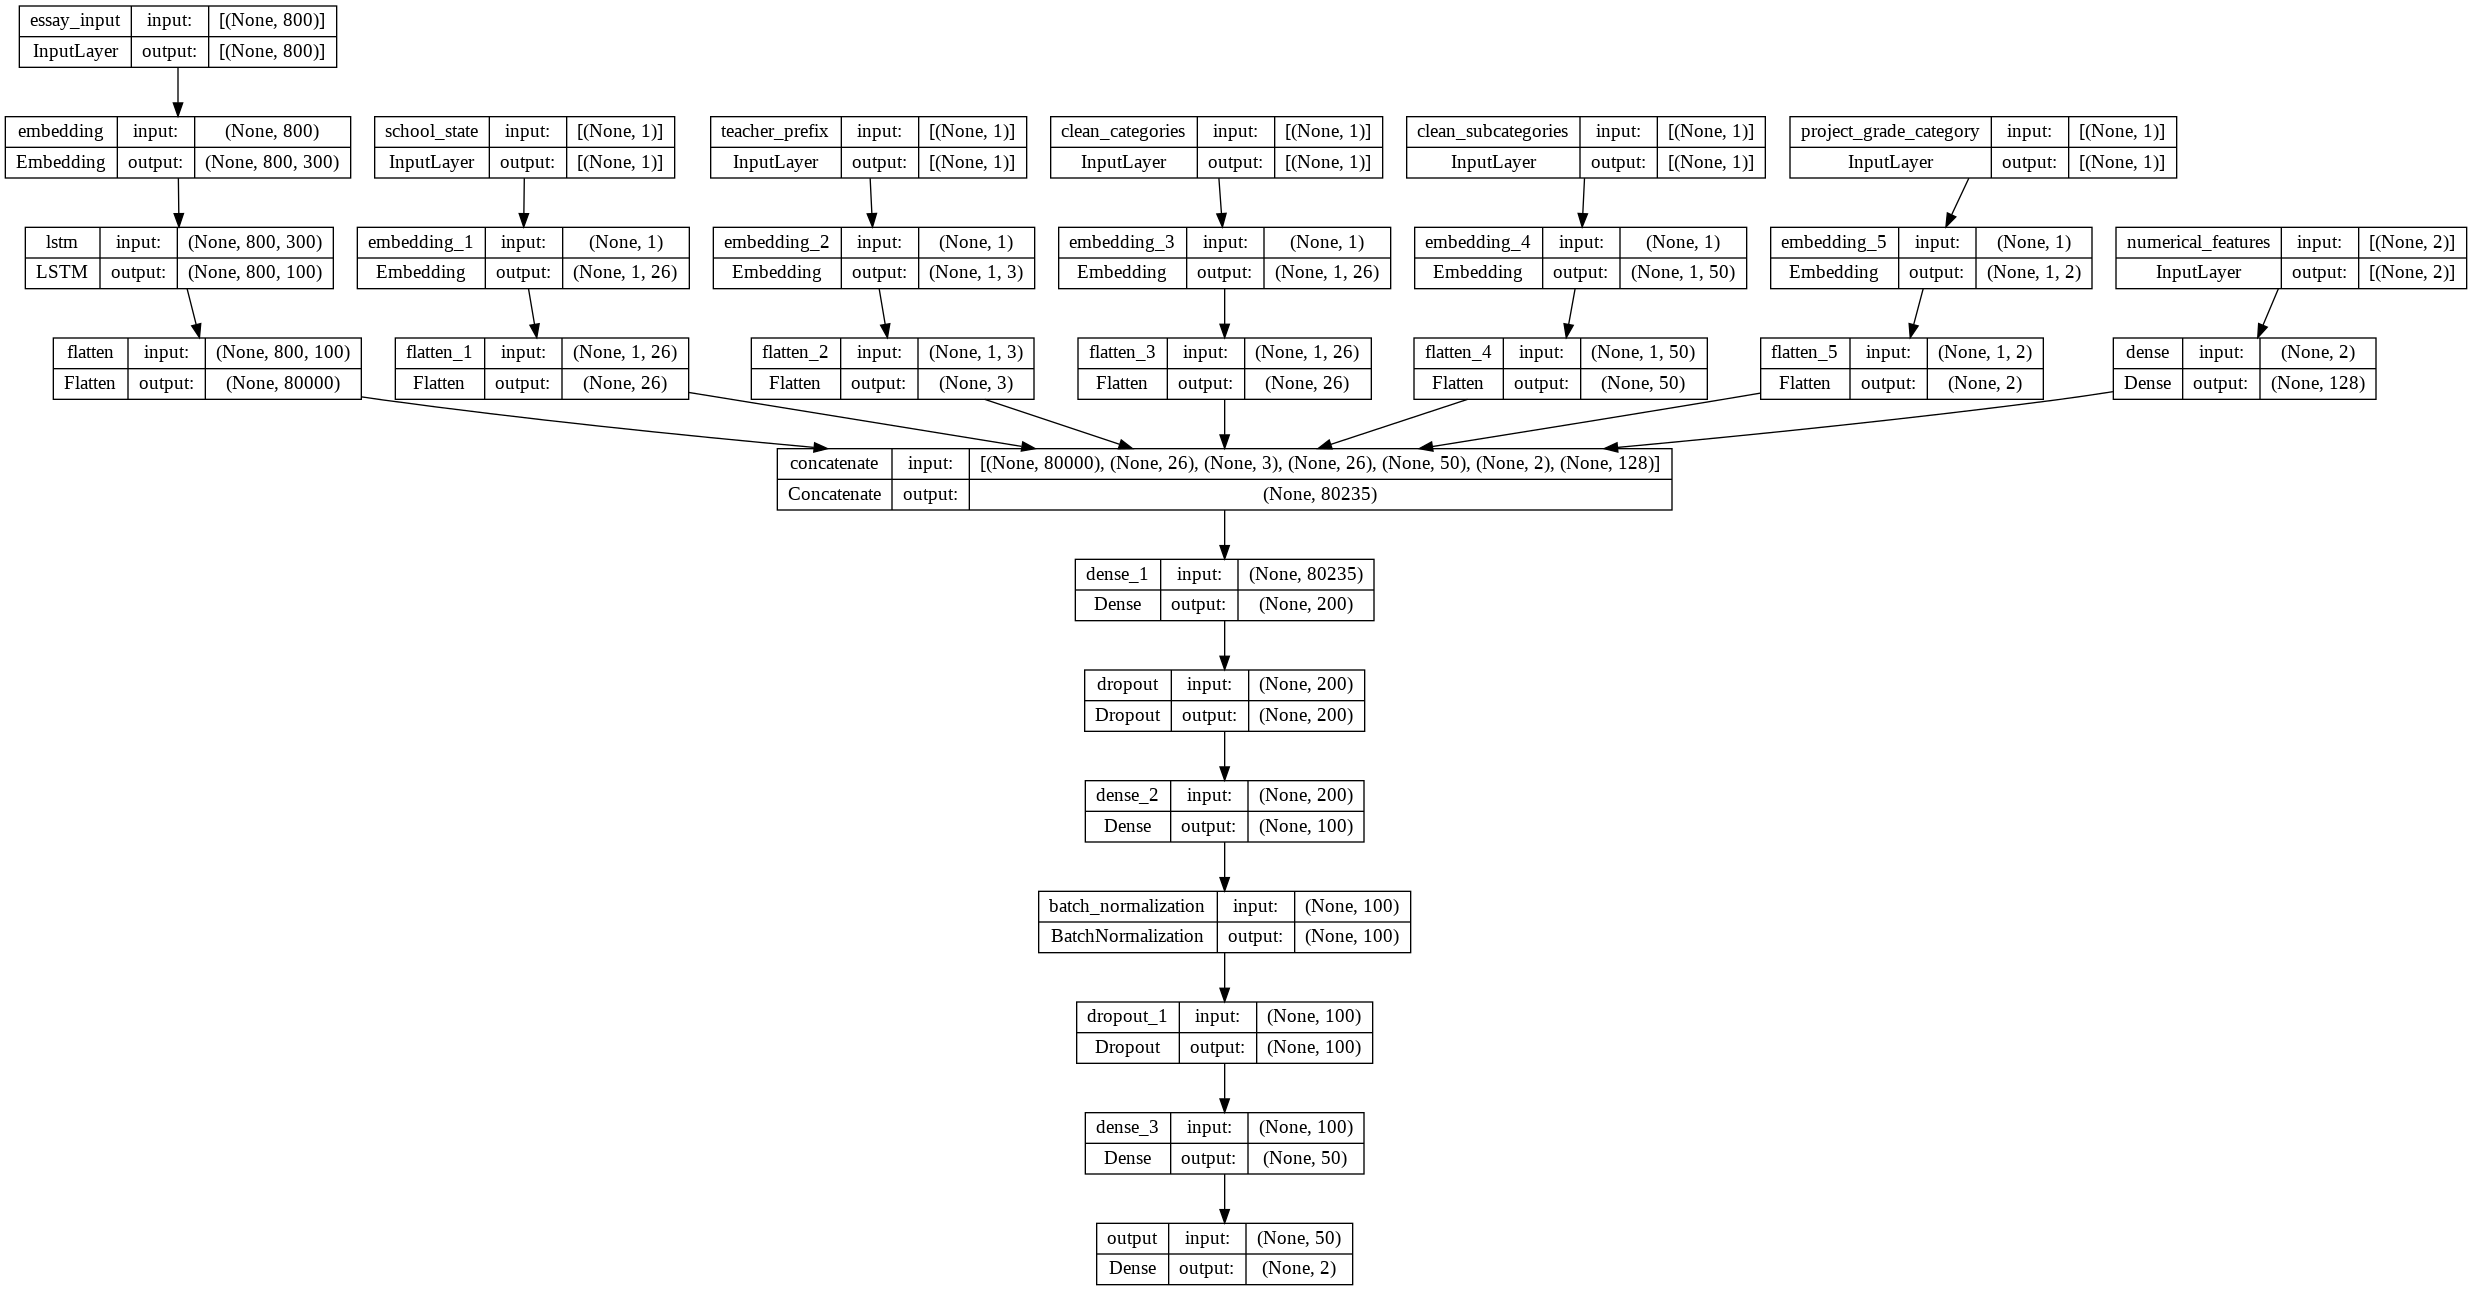

In [29]:
plot_model(model_1,'image_1.png',show_shapes=True)

In [30]:
!rm -rf ./model1_logs/

In [31]:
checkpoint1 = ModelCheckpoint("model_1.h5",monitor="val_auroc",mode="max",save_best_only = True,verbose=1)
earlystop1 = EarlyStopping(monitor = 'val_auroc', mode="max",min_delta = 0,patience = 3,verbose = 1)

tensorboard1 = TensorBoard(log_dir='Model1_visualization')

callbacks_1 = [checkpoint1,earlystop1,tensorboard1]

In [32]:
final_X_train_data = [X_train_pad,X_train_school_state,X_train_teacher_prefix,X_train_clean_categories,X_train_clean_subcategories,X_train_project_grade_category,X_train_numeric_features]

final_X_test_data = [X_test_pad,X_test_school_state,X_test_teacher_prefix,X_test_clean_categories,X_test_clean_subcategories,X_test_project_grade_category,X_test_numeric_features]


In [33]:
from keras.utils import np_utils

y_train = np_utils.to_categorical(Y_train, 2) 
y_test = np_utils.to_categorical(Y_test, 2)

## 1.5 Compiling and fititng your model

In [ ]:
#define custom auc as metric , do not use tf.keras.metrics
# https://stackoverflow.com/a/46844409 - custom AUC reference 1
# https://www.kaggle.com/c/santander-customer-transaction-prediction/discussion/80807  - custom AUC reference 2
# compile and fit your model

In [34]:
from sklearn.metrics import roc_auc_score
def auc1(y_true, y_pred):
    if len(np.unique(y_true[:,1])) == 1:
        return 0.5
    else:
        return roc_auc_score(y_true, y_pred)

def auroc(y_true, y_pred):
    return tf.compat.v1.py_func(auc1, (y_true, y_pred), tf.double)

In [35]:
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[auroc])


In [ ]:
history = model_1.fit(final_X_train_data, y_train, batch_size=512, epochs=10, verbose=1,callbacks=callbacks_1, validation_data=(final_X_test_data, y_test))


Epoch 1/10


Instructions for updating:
tf.py_func is deprecated in TF V2. Instead, there are two
    options available in V2.
    - tf.py_function takes a python function which manipulates tf eager
    tensors instead of numpy arrays. It's easy to convert a tf eager tensor to
    an ndarray (just call tensor.numpy()) but having access to eager tensors
    means `tf.py_function`s can use accelerators such as GPUs as well as
    being differentiable using a gradient tape.
    - tf.numpy_function maintains the semantics of the deprecated tf.py_func
    (it is not differentiable, and manipulates numpy arrays). It drops the
    stateful argument making all functions stateful.
    


150/150 [==============================] - ETA: 0s - loss: 0.6355 - auroc: 0.7565
Epoch 1: val_auroc improved from -inf to 0.74557, saving model to model_1.h5
150/150 [==============================] - 456s 3s/step - loss: 0.6355 - auroc: 0.7565 - val_loss: 0.6641 - val_auroc: 0.7456
Epoch 2/10
150/150 [==============================] - ETA: 0s - loss: 0.5521 - auroc: 0.7842
Epoch 2: val_auroc did not improve from 0.74557
150/150 [==============================] - 456s 3s/step - loss: 0.5521 - auroc: 0.7842 - val_loss: 0.6347 - val_auroc: 0.7392
Epoch 3/10
150/150 [==============================] - ETA: 0s - loss: 0.4979 - auroc: 0.8077
Epoch 3: val_auroc did not improve from 0.74557
150/150 [==============================] - 456s 3s/step - loss: 0.4979 - auroc: 0.8077 - val_loss: 0.5388 - val_auroc: 0.7373
Epoch 4/10
150/150 [==============================] - ETA: 0s - loss: 0.4472 - auroc: 0.8356
Epoch 4: val_auroc did not improve from 0.74557
150/150 [==============================]

In [ ]:
history_1 = model_1.fit(final_X_train_data, y_train, batch_size=900, epochs=10, verbose=1,callbacks=callbacks_1, validation_data=(final_X_test_data, y_test))


Epoch 1/10
85/85 [==============================] - ETA: 0s - loss: 0.3053 - auroc: 0.9153
Epoch 1: val_auroc did not improve from 0.74557
85/85 [==============================] - 296s 3s/step - loss: 0.3053 - auroc: 0.9153 - val_loss: 0.5983 - val_auroc: 0.6878
Epoch 2/10
85/85 [==============================] - ETA: 0s - loss: 0.2718 - auroc: 0.9330
Epoch 2: val_auroc did not improve from 0.74557
85/85 [==============================] - 296s 3s/step - loss: 0.2718 - auroc: 0.9330 - val_loss: 0.5189 - val_auroc: 0.6660
Epoch 3/10
85/85 [==============================] - ETA: 0s - loss: 0.2479 - auroc: 0.9460
Epoch 3: val_auroc did not improve from 0.74557
85/85 [==============================] - 295s 3s/step - loss: 0.2479 - auroc: 0.9460 - val_loss: 0.5877 - val_auroc: 0.6630
Epoch 4/10
85/85 [==============================] - ETA: 0s - loss: 0.2296 - auroc: 0.9560
Epoch 4: val_auroc did not improve from 0.74557
85/85 [==============================] - 295s 3s/step - loss: 0.2296 - a

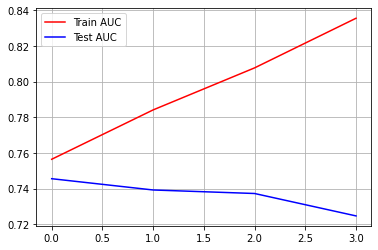

In [ ]:
from matplotlib import pyplot as plt 
plt.plot(history.history['auroc'], 'r')
plt.plot(history.history['val_auroc'], 'b')
plt.legend({'Train AUC': 'r', 'Test AUC':'g'})
plt.grid()
plt.show()

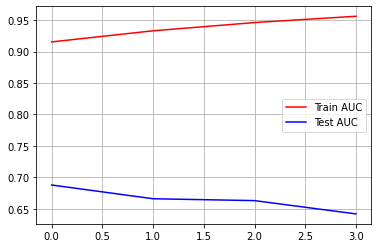

In [ ]:
from matplotlib import pyplot as plt 
plt.plot(history_1.history['auroc'], 'r')
plt.plot(history_1.history['val_auroc'], 'b')
plt.legend({'Train AUC': 'r', 'Test AUC':'g'})
plt.grid()
plt.show()

# <font color='red'> Model-2 </font>

Use the same model as above but for 'input_seq_total_text_data' give only some words in the sentance not all the words. Filter the words as below. 

<pre>
1. Fit TF-IDF vectorizer on the Train data <br>
2. Get the idf value for each word we have in the train data. Please go through <a  href='https://stackoverflow.com/questions/23792781/tf-idf-feature-weights-using-sklearn-feature-extraction-text-tfidfvectorizer'>this</a><br>

3. Do some analysis on the Idf values and based on those values choose the low and high threshold value. Because very 
frequent words and very very rare words don't give much information.
Hint - A preferable IDF range is 2-11 for model 2. <br>
4.Remove the low idf value and high idf value words from the train and test data. You can go through each of the
sentence of train and test data and include only those features(words) which are present in the defined IDF range.
5. Perform tokenization on the modified text data same as you have done for previous model.
6. Create embedding matrix for model 2 and then use the rest of the features similar to previous model.
7. Define the model, compile and fit the model.
</pre>

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(analyzer = 'word')
tfidf.fit(X_train['essay'].values)


TfidfVectorizer()

In [37]:
tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(X_train["essay"])

In [38]:
data = {'word': tfidf_vectorizer.get_feature_names() , 'idf_value': tfidf_vectorizer.idf_}
tfidf_df = pd.DataFrame(data=data)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [39]:
print("Min tf-idf value is: ",min(tfidf_df['idf_value']))
print("Max tf-idf value is: ",max(tfidf_df['idf_value']))

Min tf-idf value is:  1.0074419070198535
Max tf-idf value is:  11.551558912204982


Remove low idf_ words from essays

In [40]:
filter =   (tfidf_df['idf_value']>=2) & (tfidf_df['idf_value'] <=11.21)
tfidf_best = tfidf_df[filter]
Best_tfidf = tfidf_best['word'].tolist()

print(tfidf_best.shape)

(29874, 2)


In [41]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(Best_tfidf)

X_train['essay_tok_2']  = tokenizer.texts_to_sequences(X_train['essay'].values)

X_test['essay_tok_2']   = tokenizer.texts_to_sequences(X_test['essay'].values)

In [42]:
max_vocabulary1 = len(tokenizer.word_index)
print("There are {} number of unique words in the entire text corpus".format(max_vocabulary1))

print(X_train['essay_tok_2'].values[0])
print(len(X_train['essay_tok_2'].values[0]))

There are 29874 number of unique words in the entire text corpus
[1619, 558, 11815, 16446, 23302, 12321, 29535, 25606, 21459, 11679, 2403, 8623, 9647, 1490, 21578, 11021, 15981, 3787, 16146, 25645, 20188, 12746, 10143, 25628, 10455, 20918, 25974, 4971, 850, 21147, 15701, 12826, 7410, 16615, 4675, 850, 3564, 9536, 11724, 18063, 29049, 26450, 29701, 6855, 19774, 16446, 23302, 19777, 6862, 24172, 29714, 18414, 4268, 5568, 25997, 20239, 13364, 3035, 6862, 2136, 428, 19389, 23798, 4344, 14771, 20771, 25977, 9982, 19389, 23798, 3025, 22870, 13471, 558, 11815, 15876, 12691, 5558, 5454, 18113, 5558, 4200, 12801, 16343, 6590, 5560, 19390, 8682, 850]
89


In [43]:
max_review_length = 800

X_train_pad1 = pad_sequences(X_train['essay_tok_2'].values, maxlen=max_review_length , padding='post' )
X_test_pad1  = pad_sequences(X_test['essay_tok_2'].values, maxlen=max_review_length , padding='post' )


In [44]:
X_train_pad1[0]

array([ 1619,   558, 11815, 16446, 23302, 12321, 29535, 25606, 21459,
       11679,  2403,  8623,  9647,  1490, 21578, 11021, 15981,  3787,
       16146, 25645, 20188, 12746, 10143, 25628, 10455, 20918, 25974,
        4971,   850, 21147, 15701, 12826,  7410, 16615,  4675,   850,
        3564,  9536, 11724, 18063, 29049, 26450, 29701,  6855, 19774,
       16446, 23302, 19777,  6862, 24172, 29714, 18414,  4268,  5568,
       25997, 20239, 13364,  3035,  6862,  2136,   428, 19389, 23798,
        4344, 14771, 20771, 25977,  9982, 19389, 23798,  3025, 22870,
       13471,   558, 11815, 15876, 12691,  5558,  5454, 18113,  5558,
        4200, 12801, 16343,  6590,  5560, 19390,  8682,   850,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [45]:
with open('drive/MyDrive/LSTM_donors_choose_26/glove_vectors','rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [46]:
# create a weight matrix for words in training docs
from numpy import zeros
max_vocabulary_1 = len(tokenizer.word_index)
embedding_matrix_1 = zeros((max_vocabulary_1+1, 300))
for word, i in tokenizer.word_index.items():
  if word in glove_words:
    embedding_vector_1 = model.get(word)
    embedding_matrix_1[i] = embedding_vector_1

print(max_vocabulary_1)
print(embedding_matrix_1.shape)

29874
(29875, 300)


In [47]:
print(embedding_matrix_1[1].shape)
print(embedding_matrix_1[1])


(300,)
[ 0.38311    0.58955   -0.42684   -0.11505    0.23785    0.29834
 -0.71938    0.15237    0.085018   0.041687  -0.34072    0.97654
  0.24777    0.09065   -0.43767   -0.08772    0.0031667 -0.071644
  0.55351   -0.11632   -0.028157   0.32075    0.26208    0.37667
  0.26503   -0.11469    0.032618  -0.18537    0.10012    0.49492
  0.20423   -0.43822    0.48834   -0.43821    0.41716   -0.10504
  0.044853  -0.38108   -0.087677   0.94326   -0.28966   -0.0069608
 -0.33716   -0.18373    0.060478   0.27742   -0.035231   0.30744
 -0.66424    0.089716   0.14229    0.84869   -0.12057   -0.14589
 -0.22944    0.34677    0.062355  -0.48993    0.47824   -0.022702
  0.42403    0.31398    0.043538   0.35516    0.57668    0.47269
  0.14307    0.23131   -0.12372    0.25442   -0.23657   -0.41193
  0.10668   -0.66548   -0.70757    0.1851    -0.1038    -0.39208
  0.18296   -0.30977   -0.018167   0.32197    0.17513   -0.42211
 -0.13277    0.29645    0.021128  -0.34988    0.71415   -0.3805
 -0.22953   -0.

In [48]:
train_all = [X_train_pad1,X_train_school_state,X_train_teacher_prefix,X_train_clean_categories,X_train_clean_subcategories,X_train_project_grade_category,X_train_numeric_features]
test_all = [X_test_pad1,X_test_school_state,X_test_teacher_prefix,X_test_clean_categories,X_test_clean_subcategories,X_test_project_grade_category,X_test_numeric_features]


In [49]:
essay1 = Input(shape=(800,), name='essay_input1')

X = Embedding(output_dim=300, input_dim=max_vocabulary_1+1, input_length=800 , weights=[embedding_matrix_1])(essay1)
lstm_essay = LSTM(100,recurrent_dropout=0.5,kernel_regularizer= l2(0.001),return_sequences=True)(X)
flatten_new = Flatten()(lstm_essay)

X_concat = concatenate([flatten_new , flatten_2 , flatten_3 ,flatten_4 , flatten_5 , flatten_6 , numeric_dense])

model = Dense(50, activation="relu", kernel_initializer="he_normal" ,kernel_regularizer= l2(0.001))(X_concat)

model = Dropout(0.25)(model)

model = Dense(200,activation="relu",kernel_initializer="glorot_normal" ,kernel_regularizer= l2(0.001))(model)

model = BatchNormalization()(model)

model = Dropout(0.5)(model)

model = Dense(80,activation="sigmoid", kernel_initializer="glorot_normal" ,kernel_regularizer= l2(0.001))(model)

output = Dense(2, activation='softmax', name='output')(model)

model_2 = Model(inputs=[essay1, school_state ,teacher_prefix,clean_categories,clean_subcategories ,project_grade_category ,numeric_features ],outputs=[output])

print(model_2.summary())

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 essay_input1 (InputLayer)      [(None, 800)]        0           []                               
                                                                                                  
 embedding_6 (Embedding)        (None, 800, 300)     8962500     ['essay_input1[0][0]']           
                                                                                                  
 school_state (InputLayer)      [(None, 1)]          0           []                               
                                                                                                  
 teacher_prefix (InputLayer)    [(None, 1)]          0           []                               
                                                                                            

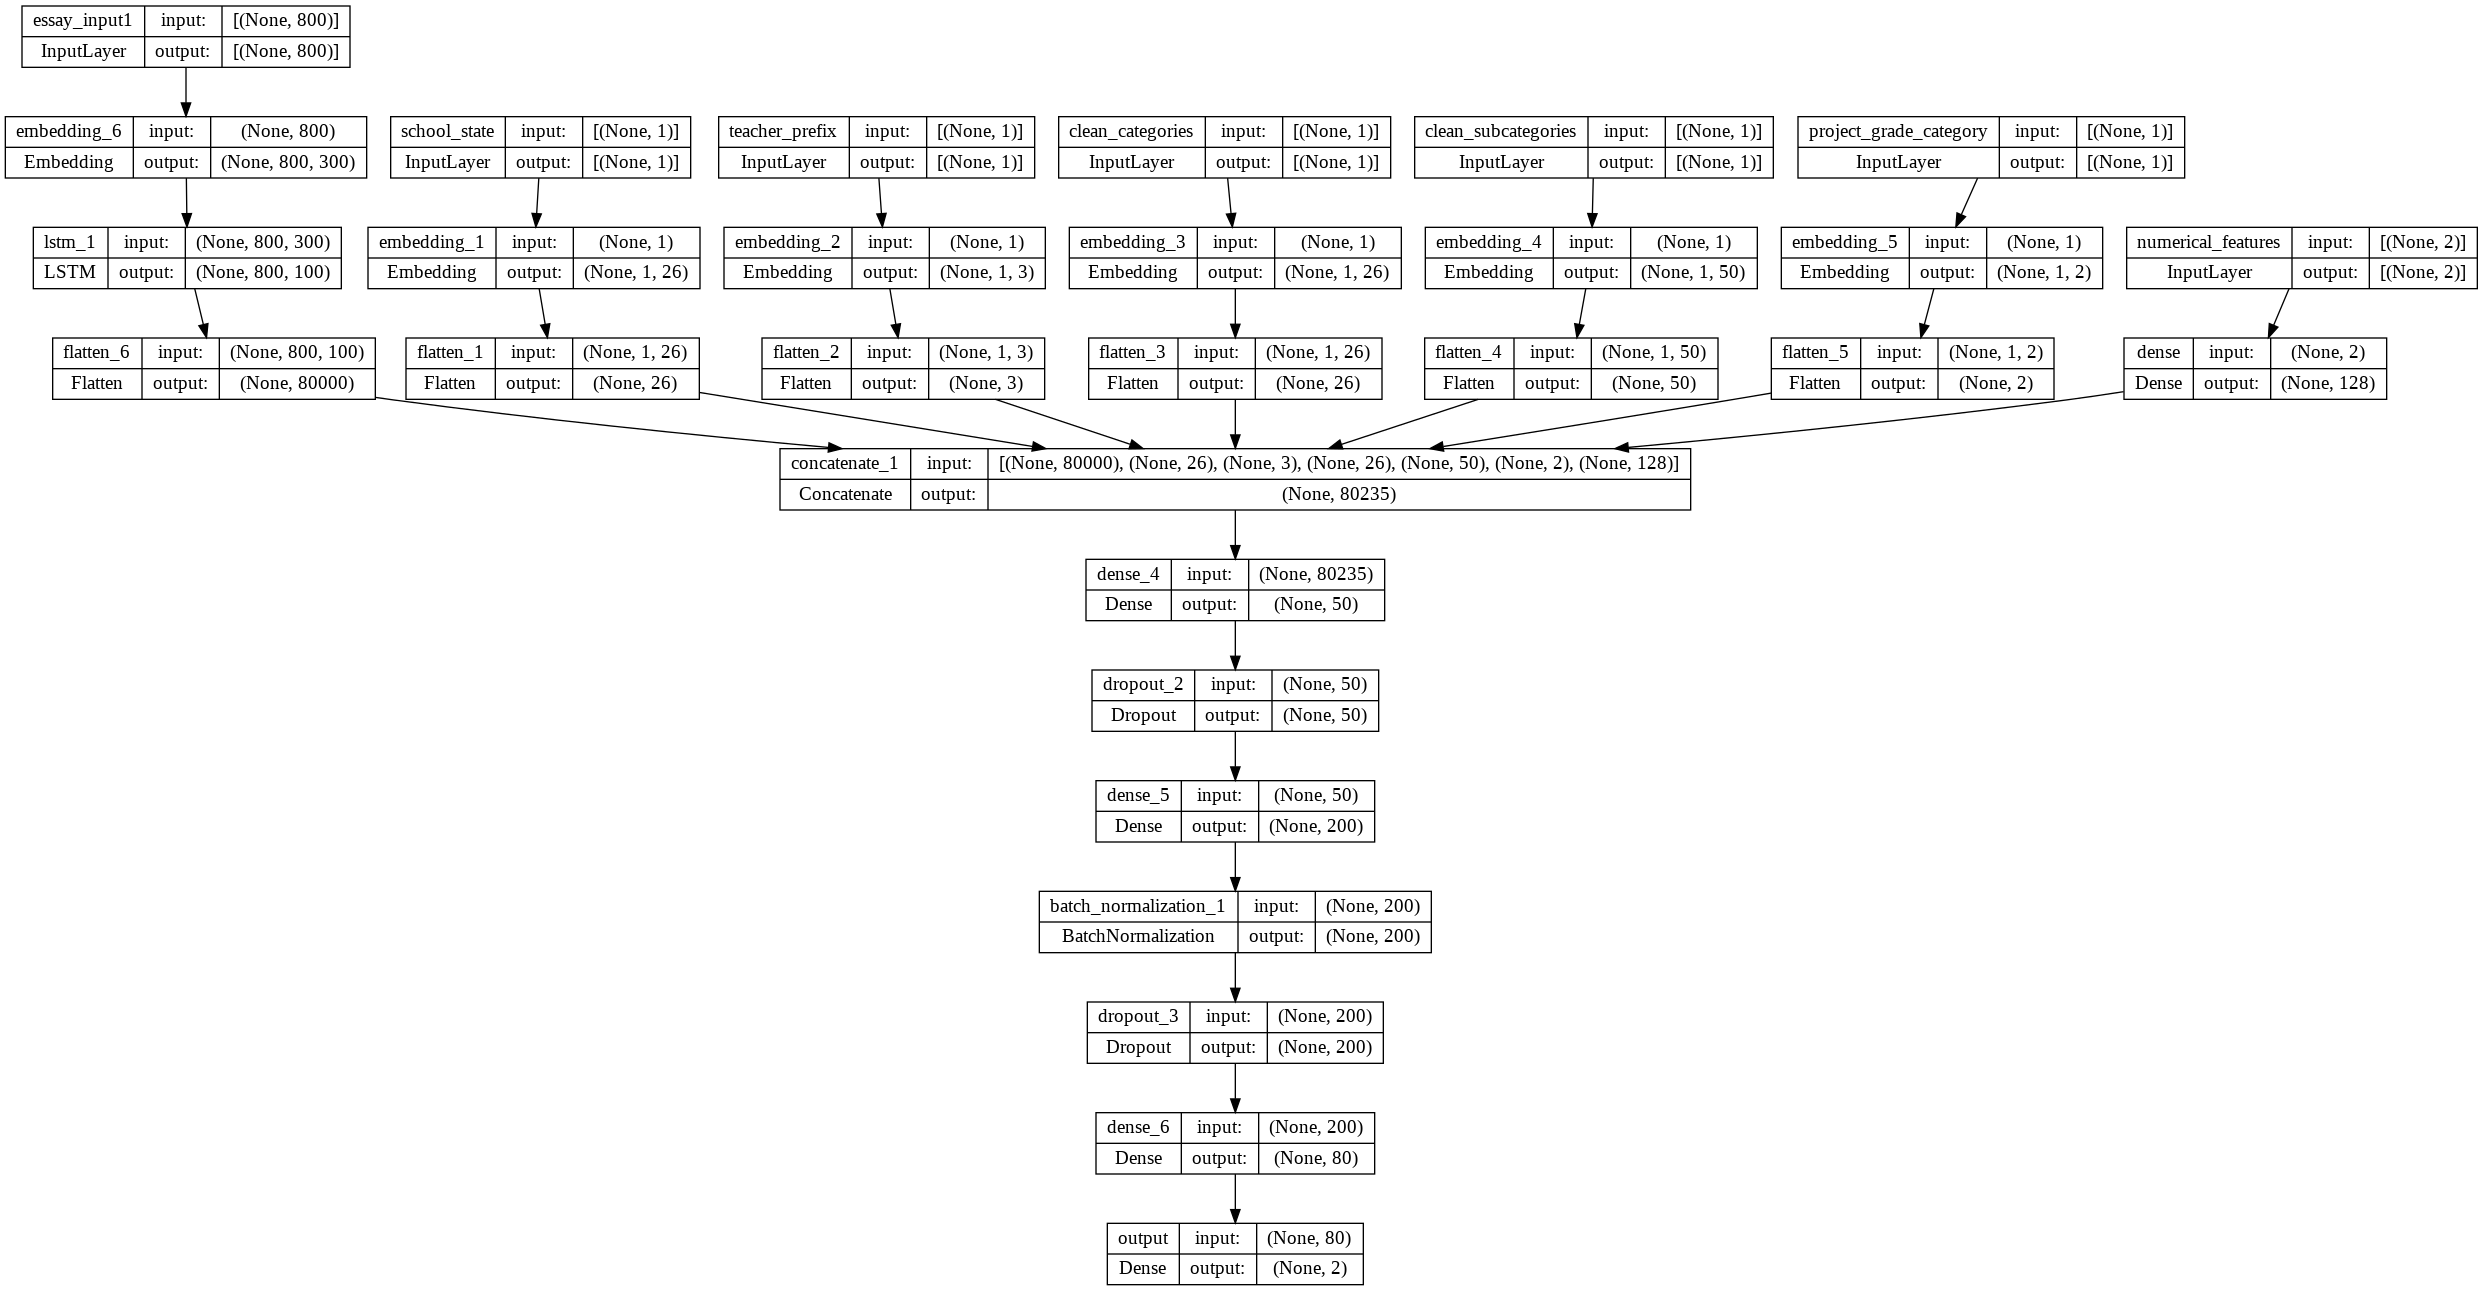

In [50]:
plot_model(model_2,'image_2.png',show_shapes=True)

In [51]:
checkpoint_2 = ModelCheckpoint("model_2.h5",monitor="val_auroc",mode="max",save_best_only = True,verbose=1)
earlystop_2 = EarlyStopping(monitor = 'val_auroc', mode="max",min_delta = 0, patience = 2,verbose = 1)

tensorboard_2 = TensorBoard(log_dir='Model2_visualization')

callbacks_2 = [checkpoint_2,earlystop_2,tensorboard_2]

In [ ]:
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[auroc])
history_2 = model_2.fit(train_all, y_train, batch_size=900, epochs=30, verbose=1,callbacks=callbacks_2, validation_data=(test_all, y_test))


Epoch 1/30
85/85 [==============================] - ETA: 0s - loss: 0.6793 - auroc: 0.6511
Epoch 1: val_auroc improved from -inf to 0.73374, saving model to model_2.h5
85/85 [==============================] - 272s 3s/step - loss: 0.6793 - auroc: 0.6511 - val_loss: 0.5284 - val_auroc: 0.7337
Epoch 2/30
85/85 [==============================] - ETA: 0s - loss: 0.4672 - auroc: 0.7563
Epoch 2: val_auroc improved from 0.73374 to 0.74636, saving model to model_2.h5
85/85 [==============================] - 271s 3s/step - loss: 0.4672 - auroc: 0.7563 - val_loss: 0.4766 - val_auroc: 0.7464
Epoch 3/30
85/85 [==============================] - ETA: 0s - loss: 0.4156 - auroc: 0.7849
Epoch 3: val_auroc improved from 0.74636 to 0.74706, saving model to model_2.h5
85/85 [==============================] - 270s 3s/step - loss: 0.4156 - auroc: 0.7849 - val_loss: 0.4474 - val_auroc: 0.7471
Epoch 4/30
85/85 [==============================] - ETA: 0s - loss: 0.3833 - auroc: 0.8101
Epoch 4: val_auroc did not 

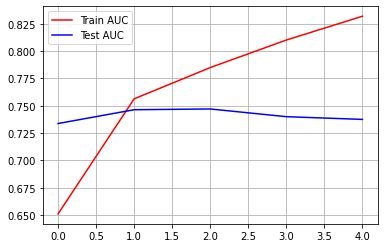

In [ ]:
from matplotlib import pyplot as plt 
plt.plot(history_2.history['auroc'], 'r')
plt.plot(history_2.history['val_auroc'], 'b')
plt.legend({'Train AUC': 'r', 'Test AUC':'g'})
plt.grid()
plt.show()

# <font color='red'> Model-3 </font>

<img src='https://i.imgur.com/fkQ8nGo.png'>
ref: https://i.imgur.com/fkQ8nGo.png

In [ ]:
#in this model you can use the text vectorized data from model1 
#for other than text data consider the following steps
# you have to perform one hot encoding of categorical features. You can use onehotencoder() or countvectorizer() for the same.
# Stack up standardised numerical features and all the one hot encoded categorical features
#the input to conv1d layer is 3d, you can convert your 2d data to 3d using np.newaxis
# Note - deep learning models won't work with sparse features, you have to convert them to dense features before fitting in the model.

In [52]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(X_train['school_state'].values)
X_train_state_one_hot = vectorizer.transform(X_train['school_state'].values)
X_test_state_one_hot = vectorizer.transform(X_test['school_state'].values)

print(X_train_state_one_hot.shape, y_train.shape)
print(X_test_state_one_hot.shape, y_test.shape)

(76473, 51) (76473, 2)
(32775, 51) (32775, 2)


In [53]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_categories'].values)

X_train_categories_one_hot = vectorizer.transform(X_train['clean_categories'].values)
X_test_categories_one_hot = vectorizer.transform(X_test['clean_categories'].values)

print(vectorizer.get_feature_names())

print(X_train_categories_one_hot.shape, y_train.shape)
print(X_test_categories_one_hot.shape, y_test.shape)


['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']
(76473, 9) (76473, 2)
(32775, 9) (32775, 2)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [54]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_subcategories'].values)

X_train_subcategories_one_hot = vectorizer.transform(X_train['clean_subcategories'].values)
X_test_subcategories_one_hot = vectorizer.transform(X_test['clean_subcategories'].values)
print(vectorizer.get_feature_names())

print(X_train_subcategories_one_hot.shape, y_train.shape)
print(X_test_subcategories_one_hot.shape, y_test.shape)


['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']
(76473, 30) (76473, 2)
(32775, 30) (32775, 2)


In [55]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['teacher_prefix'].values)
X_train_teacher_prefix_one_hot = vectorizer.transform(X_train['teacher_prefix'].values)
X_test_teacher_prefix_one_hot = vectorizer.transform(X_test['teacher_prefix'].values)

print(X_train_teacher_prefix_one_hot.shape, y_train.shape)
print(X_test_teacher_prefix_one_hot.shape, y_test.shape)


(76473, 5) (76473, 2)
(32775, 5) (32775, 2)


In [56]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['project_grade_category'].values)
X_train_project_grade_one_hot = vectorizer.transform(X_train['project_grade_category'].values)
X_test_project_grade_one_hot = vectorizer.transform(X_test['project_grade_category'].values)
print(vectorizer.get_feature_names())

print(X_train_project_grade_one_hot.shape, y_train.shape)
print(X_test_project_grade_one_hot.shape, y_test.shape)


['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']
(76473, 4) (76473, 2)
(32775, 4) (32775, 2)


In [57]:
from sklearn.preprocessing import StandardScaler
stnd_scaler=StandardScaler()
stnd_scaler.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

X_train_num_projects=stnd_scaler.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

X_test_num_projects=stnd_scaler.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print(X_train_num_projects.shape,X_test_num_projects.shape)

(76473, 1) (32775, 1)


In [58]:
stnd_scaler.fit(X_train['price'].values.reshape(-1,1))

X_train_price = stnd_scaler.transform(X_train['price'].values.reshape(-1,1))

X_test_price = stnd_scaler.transform(X_test['price'].values.reshape(-1,1))

print(X_train_price.shape,X_test_price.shape)

(76473, 1) (32775, 1)


In [59]:
X_train_numeric_features = np.concatenate((X_train_num_projects , X_train_price) , axis = 1)

X_test_numeric_features= np.concatenate((X_test_num_projects , X_test_price) , axis = 1)

print(X_train_numeric_features.shape ,X_test_numeric_features.shape)


(76473, 2) (32775, 2)


In [60]:
from scipy.sparse import hstack
train_features_without_text = hstack((X_train_state_one_hot, X_train_categories_one_hot, X_train_subcategories_one_hot, X_train_teacher_prefix_one_hot, X_train_project_grade_one_hot, X_train_numeric_features)).todense()
print(train_features_without_text.shape)

test_features_without_text = hstack((X_test_state_one_hot, X_test_categories_one_hot, X_test_subcategories_one_hot, X_test_teacher_prefix_one_hot, X_test_project_grade_one_hot, X_test_numeric_features)).todense()
print(test_features_without_text.shape)

(76473, 101)
(32775, 101)


In [61]:
print(X_train_pad.shape)

(76473, 800)


In [62]:
rest_features_train = np.expand_dims(train_features_without_text,2)
rest_features_test = np.expand_dims(test_features_without_text,2)

In [63]:
train_3 = [X_train_pad,X_train_pad1,train_features_without_text]
test_3= [X_test_pad,X_test_pad1,test_features_without_text]

In [64]:
from keras.layers import Input, Dense, Embedding, Flatten, concatenate, Dropout, Convolution1D, GlobalMaxPool1D, SpatialDropout1D, CuDNNGRU, Bidirectional, PReLU, GRU,LSTM

essay = Input(shape=(800,), name='essay_input')
X = Embedding(output_dim=300, input_dim=max_vocabulary+1, input_length=800 , weights=[embedding_matrix])(essay)
x_words = LSTM(64,recurrent_dropout=0.3,kernel_regularizer=l2(0.001),return_sequences=True)(X)
flatten_1 = Flatten()(x_words)


essay1 = Input(shape=(800,), name='essay_input1')
X1 = Embedding(output_dim=300, input_dim=max_vocabulary_1+1, input_length=800 , weights=[embedding_matrix_1])(essay1)
x_words1 = LSTM(64,recurrent_dropout=0.3,kernel_regularizer=l2(0.001),return_sequences=True)(X1)
flatten_new = Flatten()(x_words1)


input_layer_other_than_text_data = Input(shape=(101,1),name="other_than_text_data")
conv1D_1 = Conv1D(filters=32, kernel_size=3, activation='relu',kernel_initializer="he_normal")(input_layer_other_than_text_data)
conv1D_2 = Conv1D(filters=32, kernel_size=3, activation='relu',kernel_initializer="he_normal")(conv1D_1)
flatten_other_than_text_data = Flatten()(conv1D_2)

X_concat = concatenate([flatten_1 ,flatten_new, flatten_other_than_text_data])

model = Dense(300, activation="relu", kernel_initializer="he_normal" ,kernel_regularizer=l2(0.001))(X_concat)

model = Dropout(0.25)(model)

model = Dense(150,activation="relu",kernel_initializer="glorot_normal" ,kernel_regularizer= l2(0.001))(model)

model = BatchNormalization()(model)

model = Dropout(0.5)(model)

model = Dense(80,activation="sigmoid", kernel_initializer="glorot_normal" ,kernel_regularizer= l2(0.001))(model)

output = Dense(2, activation='softmax', name='output')(model)

model_3 = Model(inputs=[essay,essay1,input_layer_other_than_text_data],outputs=[output])



print(model_3.summary())

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 essay_input (InputLayer)       [(None, 800)]        0           []                               
                                                                                                  
 essay_input1 (InputLayer)      [(None, 800)]        0           []                               
                                                                                                  
 other_than_text_data (InputLay  [(None, 101, 1)]    0           []                               
 er)                                                                                              
                                                                                                  
 embedding_7 (Embedding)        (None, 800, 300)     14708400    ['essay_input[0][0]']      

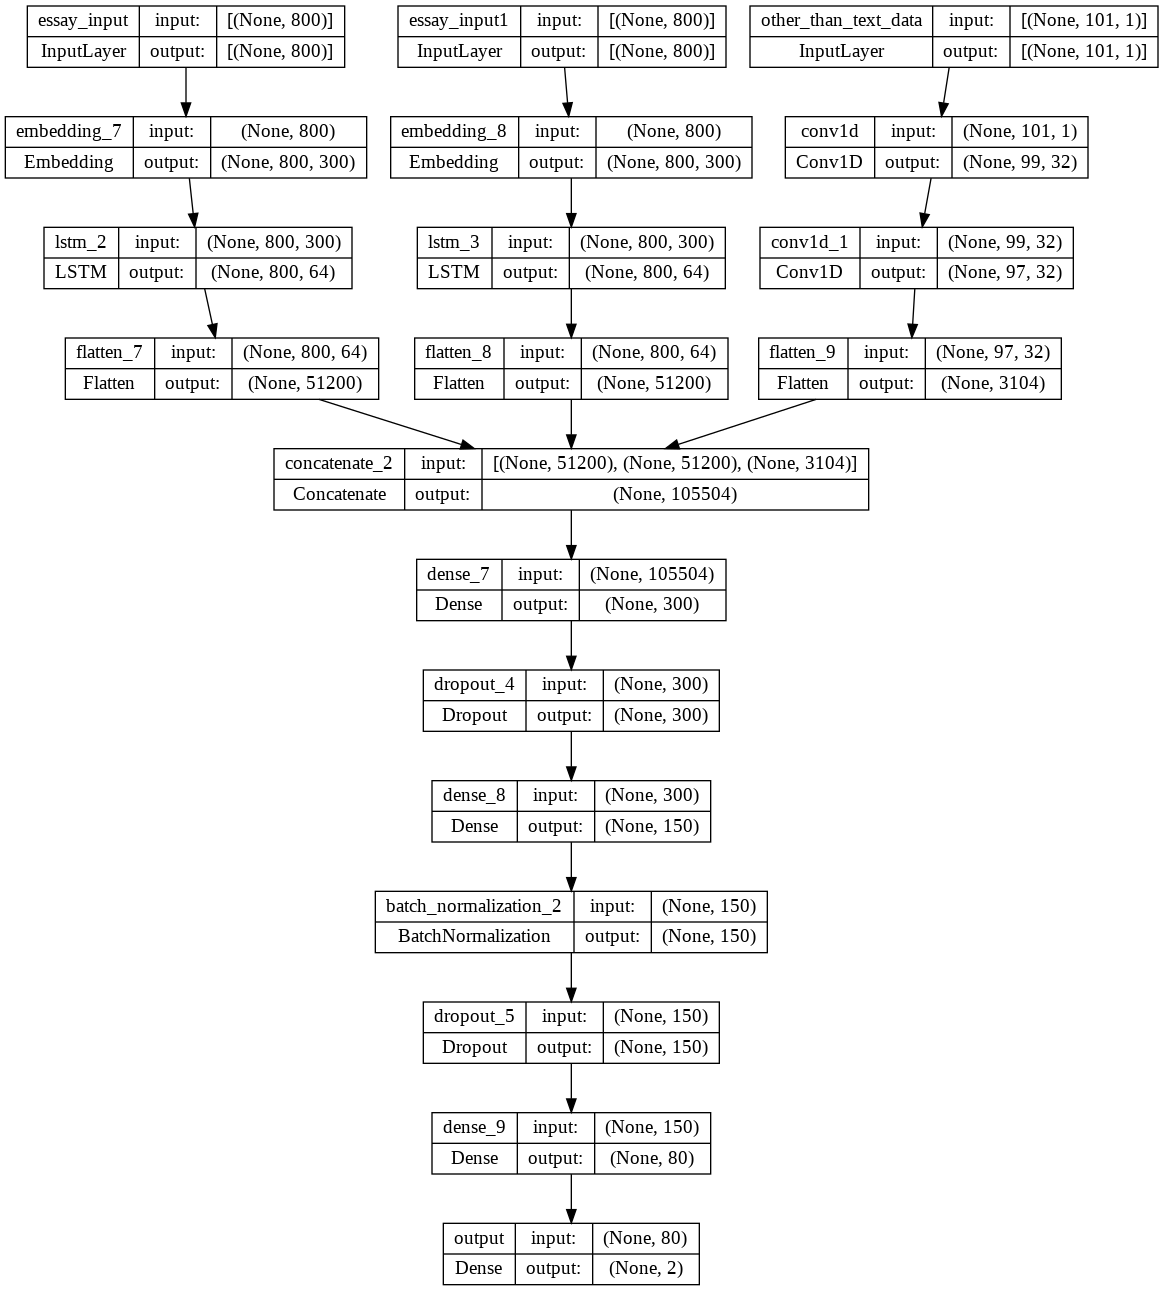

In [66]:
plot_model(model_3,'image_3.png',show_shapes=True)

In [67]:
checkpoint_3 = ModelCheckpoint("model_3_1.h5",
                             monitor="val_auroc",
                             mode="max",
                             save_best_only = True,
                             verbose=1)
earlystop_3 = EarlyStopping(monitor = 'val_auroc', 
                            mode="max",
                            min_delta = 0, 
                            patience = 2,
                            verbose = 1)

tensorboard_3 = TensorBoard(log_dir='Model3_1_visualization')

callbacks_3 = [checkpoint_3,earlystop_3,tensorboard_3]


In [68]:
model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[auroc])

In [69]:
history_3 = model_3.fit(train_3, y_train, batch_size=500, epochs=25, verbose=1,callbacks=callbacks_3, validation_data=(test_3, y_test))


Epoch 1/25


Instructions for updating:
tf.py_func is deprecated in TF V2. Instead, there are two
    options available in V2.
    - tf.py_function takes a python function which manipulates tf eager
    tensors instead of numpy arrays. It's easy to convert a tf eager tensor to
    an ndarray (just call tensor.numpy()) but having access to eager tensors
    means `tf.py_function`s can use accelerators such as GPUs as well as
    being differentiable using a gradient tape.
    - tf.numpy_function maintains the semantics of the deprecated tf.py_func
    (it is not differentiable, and manipulates numpy arrays). It drops the
    stateful argument making all functions stateful.
    


153/153 [==============================] - ETA: 0s - loss: 0.8628 - auroc: 0.6445 
Epoch 1: val_auroc improved from -inf to 0.74516, saving model to model_3_1.h5
153/153 [==============================] - 4141s 27s/step - loss: 0.8628 - auroc: 0.6445 - val_loss: 0.5212 - val_auroc: 0.7452
Epoch 2/25
153/153 [==============================] - ETA: 0s - loss: 0.4685 - auroc: 0.7518 
Epoch 2: val_auroc improved from 0.74516 to 0.76338, saving model to model_3_1.h5
153/153 [==============================] - 4203s 27s/step - loss: 0.4685 - auroc: 0.7518 - val_loss: 0.4506 - val_auroc: 0.7634
Epoch 3/25
153/153 [==============================] - ETA: 0s - loss: 0.4097 - auroc: 0.7789 
Epoch 3: val_auroc did not improve from 0.76338
153/153 [==============================] - 4360s 29s/step - loss: 0.4097 - auroc: 0.7789 - val_loss: 0.4109 - val_auroc: 0.7578
Epoch 4/25
153/153 [==============================] - ETA: 0s - loss: 0.3785 - auroc: 0.8049 
Epoch 4: val_auroc did not improve from 0.

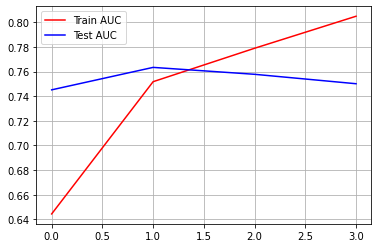

In [70]:
from matplotlib import pyplot as plt 
plt.plot(history_3.history['auroc'], 'r')
plt.plot(history_3.history['val_auroc'], 'b')
plt.legend({'Train AUC': 'r', 'Test AUC':'g'})
plt.grid()
plt.show()